<a href="https://colab.research.google.com/github/fell100/Machine-Learning/blob/master/FELIPE_MIRANDA_CARDOSO_DE_SA_4_MLP_BP_exerc%C3%ADcio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch 

# Descrição

No último exercício verificamos a limitação em usar um modelo linear para algo mais complexo que uma equação linear.

Neste exercício, a sua tarefa é verificar a capacidade de uma rede neural multicamada para aproximar a função seno.

$y = sen(2x)$

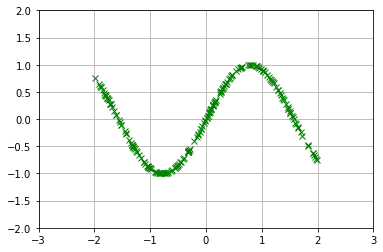

In [7]:
N = 200
# criar o vetor x com N valores entre -2 e 2
x = (np.random.rand(N)*4)-2
#cria o vetor y
y = np.sin(2*x)
plt.plot(x,y,'xg')
plt.grid('both')
plt.axis([-3,3,-2,2]);

Novamente, vamos fazer a divisão dos dados em teste e treinamento.

In [8]:
nTreinamento = int(0.7*N) # colocar 70% dos dados para treinamento
x_train = np.array(x[0:nTreinamento],dtype=np.float32)
x_train = x_train.reshape(-1,1)

y_train = np.array(y[0:nTreinamento],dtype=np.float32)
y_train = y_train.reshape(-1,1)

x_teste = np.array(x[nTreinamento:],dtype=np.float32)
x_teste = x_teste.reshape(-1,1)

y_teste = np.array(y[nTreinamento:],dtype=np.float32)
y_teste = y_teste.reshape(-1,1)


In [9]:
if torch.cuda.is_available():
  model.cuda()
  print('Ueba! Vamos de GPU')
else:
  print('Ok. Vamos de CPU')

Ok. Vamos de CPU


Com base no que foi feito no exercício anterior, crie uma rede para aproximar a função em questão.

Lembre-se de não usar uma função de ativação no último neurônio.

Na próxima célula você deve:


*   definir a taxa de aprendizado
*   determinar a arquitetura da sua rede. Ela terá uma entrada e uma saída. Você tem liberdade para ecolher o número de camadas escondidas e neurônios em cada uma delas. Sugere-se usar a tangente hiperbólica como função de ativação dos neurônios da(s) camada(s) escondida(s).
*   definir a função de erro como erro quadrático médio MSELoss
*   definir o otimizador como SGD
*   criar o modelo a partir da aquitetura determinada anteriormente



In [31]:
from torch.nn.modules.activation import Tanh
learningRate=0.05
nInputs = 1
nOutput = 1
nHidden = 7
model = torch.nn.Sequential(
    torch.nn.Linear(nInputs, nHidden),
    torch.nn.Tanh(),
    torch.nn.Linear(nHidden, nHidden),
    torch.nn.Tanh(),
    torch.nn.Linear(nHidden, nOutput)
)
#criterion = torch.nn.L1Loss() #Mean absolute error
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learningRate)
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=7, bias=True)
  (1): Tanh()
  (2): Linear(in_features=7, out_features=7, bias=True)
  (3): Tanh()
  (4): Linear(in_features=7, out_features=1, bias=True)
)


Por fim, vamos treinar a rede, visualizar os erros e os valores gerados.

Epoch:0 errors: 0.0004679717239923775
Epoch:100 errors: 0.00041173878707922995
Epoch:200 errors: 0.0003696631465572864
Epoch:300 errors: 0.00033717608312144876
Epoch:400 errors: 0.0003112258855253458


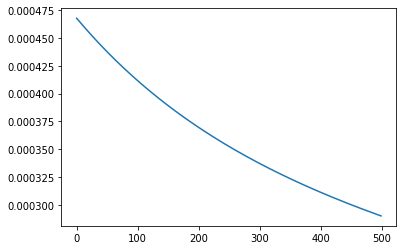

In [38]:
def train_model(nEpochs = 100):
  errors=[]
  for epoch in range(nEpochs):
    if torch.cuda.is_available():
      inputs = torch.tensor(x_train).to('cuda')
      targets = torch.tensor(y_train).to('cuda')
    else:
      inputs = torch.tensor(x_train) 
      targets = torch.tensor(y_train)    
    # A linha abaixo zera os gradientes calculados anteriormente, para não acumular informações
    optimizer.zero_grad()
    # calculamos a saída da rede
    outputs = model(inputs)
    # calcula o erro
    loss = criterion(outputs, targets)
    # calcula os gradientes
    loss.backward()
    # atualiza parâmetros 
    optimizer.step()
    errors.append(loss.item())
    if(not epoch%100):
      print('Epoch:' + str(epoch) + ' errors: ' + str(loss.item()))
  return errors
  
errors = train_model(500) 
plt.plot(errors)
plt.show()

Vamos verificar visualmente os valores estimados para os dados de treinamento. Mas certifque-se de que erro caiu abaixo de 0.05.

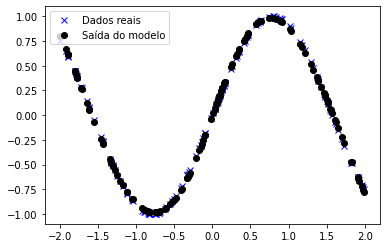

In [39]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_train).to('cuda')
  else:
    entradas = torch.tensor(x_train)
  saidas = model(entradas)

plt.clf()
plt.plot(x_train, y_train, 'xb', label='Dados reais', lw=5)
plt.plot(x_train, saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.show()

Finalmente, é necessário verificar o comportamento para dados não usados no treinamento.

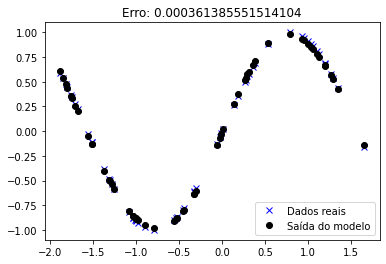

In [40]:
with torch.no_grad():# isso desabilita o cálculo de gradientes
  if torch.cuda.is_available():
    entradas = torch.tensor(x_teste).to('cuda')
    targets = torch.tensor(y_teste).to('cuda')
  else:
    entradas = torch.tensor(x_teste)
    targets = torch.tensor(y_teste)
  saidas = model(entradas)

loss = criterion(saidas,targets)
plt.clf()
plt.plot(x_teste, y_teste, 'xb', label='Dados reais', lw=5)
plt.plot(x_teste, saidas, 'ko', label='Saída do modelo')
plt.legend(loc='best')
plt.title('Erro: ' + str(loss.item()))
plt.show()